[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.

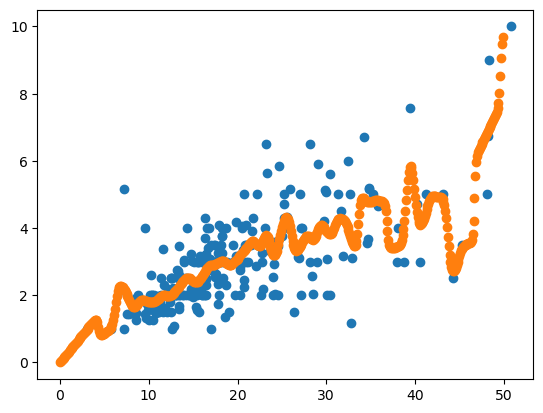

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

tou = 0.5 
data=pd.read_csv("lab10.csv") 
X_train = np.array(data.total_bill) 
print(X_train)
X_train = X_train[:, np.newaxis] 
print(len(X_train))
y_train = np.array(data.tip)

X_test = np.array([i /10 for i in range(500)]) 
X_test = X_test[:, np.newaxis]
y_test = [] 

count = 0

for r in range(len(X_test)):
    wts = np.exp(-np.sum((X_train - X_test[r]) ** 2, axis=1) / (2 * tou ** 2)) 
    W = np.diag(wts)
    factor1 = np.linalg.inv(X_train.T.dot(W).dot(X_train)) 
    parameters = factor1.dot(X_train.T).dot(W).dot(y_train) 
    prediction = X_test[r].dot(parameters) 
    y_test.append(prediction)
    count += 1 
print(len(y_test))
y_test = np.array(y_test) 
plt.plot(X_train.squeeze(), y_train, 'o')
plt.plot(X_test.squeeze(), y_test, 'o') 
plt.show()